In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import os
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
import seaborn as sns
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, zscore
import scipy
from statannotations.Annotator import Annotator

In [2]:
# #LOADING COLLECTION FROM THE LARGE DATASET (GSE124814) AND PARSING
# exp = pd.read_excel('/mnt/alessandro/Volume/Maria/data/BigArray_Data/GSE124814_HW_expr_matrix.xlsx')
# sampdesc = pd.read_excel('/mnt/alessandro/Volume/Maria/data/BigArray_Data/GSE124814_sample_descriptions.xlsx',header=1)


# #PARSING
# #PARSE TITLES
# sampdesc.columns = [x.replace('characteristics: ', '') for x in sampdesc.columns]
# sampdesc.columns.values

# #ADD SUBTYPE COLUMN
# sampdesc['subtype'] = sampdesc['subgroup supplied original'].astype(str).apply(
#     lambda x: 'Alpha' if x.endswith('_alpha') 
#     else 'Beta' if x.endswith('_beta') 
#     else 'Gamma' if x.endswith('_gamma') 
#     else 'Delta' if x.endswith('_delta') 
#     else 'Not_Specified'
# )


# #PARSE SEX
# #sampdesc.loc[sampdesc['gender'].isin('female'), 'gender'] = 'F'
# sampdesc.loc[sampdesc['gender'].isin(['female','f']), 'gender'] = 'F'
# sampdesc.loc[sampdesc['gender'].isin(['male','m']), 'gender'] = 'M'
# sampdesc = sampdesc.loc[~sampdesc['gender'].isin(['mixed_sex','  '])]


# #PARSING THE AGES
# # Remove rows where age is 'adult' (case-insensitive, strip whitespace)
# sampdesc = sampdesc[~sampdesc['age'].str.strip().str.lower().eq('adult')]

# import pandas as pd
# import numpy as np
# import re

# def convert_age_to_months(age_str):
#     if pd.isna(age_str) or str(age_str).strip() == '':
#         return np.nan

#     age_str = str(age_str).strip().lower().replace(',', '.')

#     # Match years with optional decimal
#     match_years = re.match(r'(\d+(\.\d+)?)\s*years?', age_str)
#     if match_years:
#         return float(match_years.group(1)) * 12

#     # Match months with optional decimal or abbreviation
#     match_months = re.match(r'(\d+(\.\d+)?)\s*(months?|mos?|mo\.?)', age_str)
#     if match_months:
#         return float(match_months.group(1))

#     # Match single word 'month'
#     match_month = re.match(r'(\d+(\.\d+)?)\s*month', age_str)
#     if match_month:
#         return float(match_month.group(1))

#     # Match days
#     match_days = re.match(r'(\d+)\s*days?', age_str)
#     if match_days:
#         return float(match_days.group(1)) / 30.44  # average month length

#     # Match PCW (post-conception weeks)
#     match_pcw = re.match(r'(\d+(\.\d+)?)\s*pcw', age_str)
#     if match_pcw:
#         return float(match_pcw.group(1)) / 4.348  # weeks to months

#     # Match "Xyrs Ymos" format
#     match_yrs_mos = re.match(r'(\d+)yrs?\s*(\d+)mos?', age_str)
#     if match_yrs_mos:
#         return int(match_yrs_mos.group(1)) * 12 + int(match_yrs_mos.group(2))

#     # Match "XyYm" format
#     match_y_m = re.match(r'(\d+)y(\d+)m', age_str)
#     if match_y_m:
#         return int(match_y_m.group(1)) * 12 + int(match_y_m.group(2))

#     # Match "X Y" format (e.g., 18 Y or 4 PMonth)
#     match_y = re.match(r'(\d+)\s*y', age_str)
#     if match_y:
#         return int(match_y.group(1)) * 12
#     match_pm = re.match(r'(\d+)\s*pmonth', age_str)
#     if match_pm:
#         return int(match_pm.group(1))

#     # Match plain numbers — assume months
#     try:
#         return float(age_str)
#     except ValueError:
#         pass

#     # Handle 'fetal', 'adult', or anything else unknown
#     if 'fetal' in age_str or 'adult' in age_str:
#         return np.nan

#     return np.nan

# sampdesc = sampdesc.copy()
# sampdesc['age'] = sampdesc['age'].apply(convert_age_to_months) / 12
# sampdesc.rename(columns={'age': 'age_y'}, inplace=True)

# #MERGING META AND EXPRESSION DATA
# exp.rename(columns={'Gene_Symbol': 'Sample name'}, inplace=True) #Sample name
# sampdesc.rename(columns={'subgroup relabeled': 'subgroup'}, inplace=True) #Sample name

# def categorize_age(age):
#     if age < 1:
#         return '< 1'
#     elif age < 4:
#         return '< 4'
#     elif age < 8:
#         return '< 8'
#     elif age < 12:
#         return '< 12'
#     elif age < 18:
#         return '< 18'
#     elif age < 20:
#         return '<20'
#     else:
#         return '>20'
# #sampdesc['age_cat'] = sampdesc['age_y'].apply(categorize_age)

# def get_matrix(sampdesc,exp,keep):
#     cols=['Sample name']+keep
#     # matrix var holds both the variables to analyse and the expression matrix
#     matrix = pd.merge(sampdesc[cols],exp, how='left',on='Sample name')
#     matrix.set_index('Sample name', inplace=True)
#     return matrix

# keep=['age_y','gender','subgroup','subtype','source name']
# ind = 'Sample name'
# matrix = get_matrix(sampdesc,exp,keep)

# #MATRIX PARSING
# matrix['subgroup'] = matrix['subgroup'].fillna('CTRL')
# matrix.loc[matrix['subgroup'] == 'CTRL', 'subtype'] = 'CTRL'
# matrix = matrix.loc[~(matrix['subgroup'] == 'Unknown')]

# #OBTAINING TABLE WITH ONLY EXPRESSION
# def get_exp(matrix):
#     expression = matrix.copy(deep=True)
#     expression.drop(keep,axis=1, inplace=True)
#     return expression
    
# expression = get_exp(matrix)
# #OBTAINING A METADATA DF WITH ONLY THE INFORMATION I SELECTED
# sample = matrix[keep]


# #WRITING THE PARSED DATA ONTO CSV FOR FUTURE USE

#expression.to_csv('data/table/BigArrayExp.csv.gz', index=True, compression='gzip')
#sampdesc.to_csv('data/table/BigArrayMeta.csv.gz', index=False, compression='gzip')
#sample.to_csv('data/table/BigArraySample.csv.gz', index=True, compression='gzip')
#expression
#matrix.to_csv('data/table/BigArrayExp_plus_Sample.csv.gz', index=True, compression='gzip')
#matrix

In [3]:
#LOADING SAVED TABLES TO AVOID RERUNNING CODE 
expression = pd.read_csv('data/table/BigArrayExp.csv.gz',index_col=0)
sampdesc = pd.read_csv('data/table/BigArrayMeta.csv.gz')
sample = pd.read_csv('data/table/BigArraySample.csv.gz',index_col=0)
matrix = pd.read_csv('data/table/BigArrayExp_plus_Sample.csv.gz',index_col=0)

#DEFINING Z SCORE OF AGES FOR BETTER PLOTTING
sample['all_age_z'] = zscore(sample['age_y'],nan_policy='omit')

mask = sample['source name'] == 'Medulloblastoma'
sample.loc[mask, 'age_z'] = zscore(sample.loc[mask, 'age_y'], nan_policy='omit')
mask = sample['source name'] == 'Normal'
sample.loc[mask, 'age_z'] = zscore(sample.loc[mask, 'age_y'], nan_policy='omit')



def runPCA(expression, sample=None):
    print('FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)')
    pca = PCA(n_components=2)
    vecs = pca.fit_transform(expression)
    PCA_df = pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2'], index=expression.index)
    if sample is not None:
        PCA_df = PCA_df.join(sample)
    return PCA_df


FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)


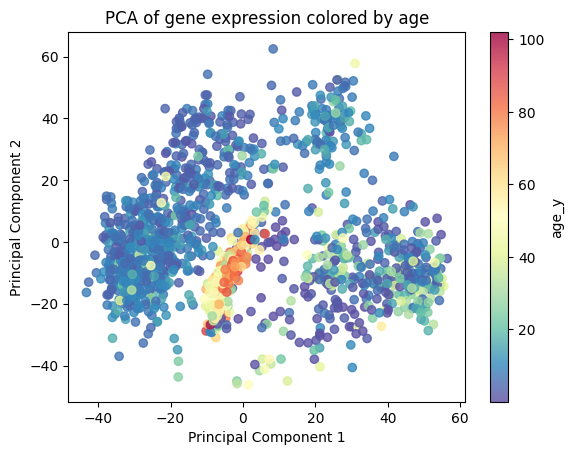

In [4]:
PCA_df = runPCA(expression,sample)

#COLORING BY AGE
scatter = plt.scatter(PCA_df['Principal Component 1'], PCA_df['Principal Component 2'], c=PCA_df['age_y'],  # Continuous variable coloring
    cmap='Spectral_r', alpha=0.8)

plt.colorbar(scatter, label='age_y')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of gene expression colored by age')
plt.show()

FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)


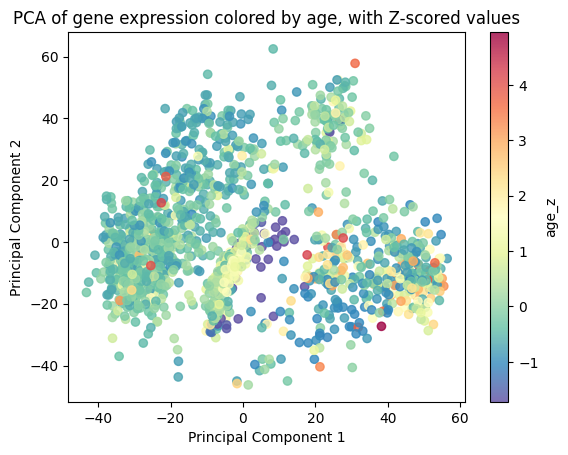

In [5]:
PCA_df = runPCA(expression,sample)

#COLORING BY AGE
scatter = plt.scatter(PCA_df['Principal Component 1'], PCA_df['Principal Component 2'], c=PCA_df['age_z'],  # Continuous variable coloring
    cmap='Spectral_r', alpha=0.8)

plt.colorbar(scatter, label='age_z')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of gene expression colored by age, with Z-scored values')
plt.show()

Text(0.5, 1.0, 'PCA of gene expression coloured by healthy vs diseased')

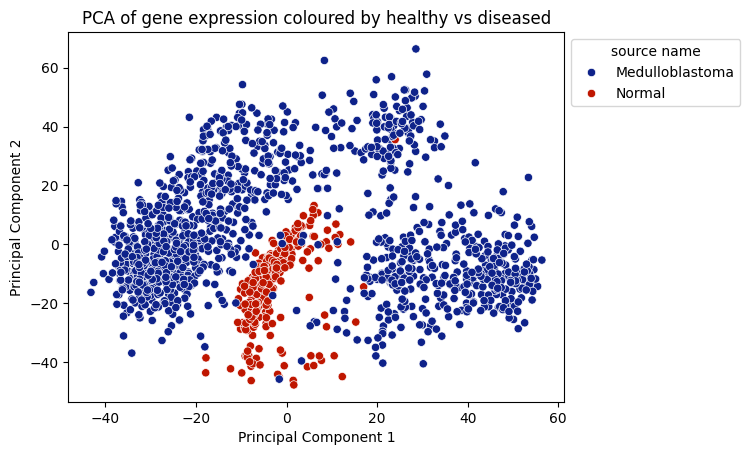

In [6]:
#PCA of gene expression coloured by healthy vs diseased
plot = sns.scatterplot(data=PCA_df, x='Principal Component 1', y='Principal Component 2', 
                       hue="source name", 
                       palette = ["#0e228a","#bf1600"])
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

plot.set_title('PCA of gene expression coloured by healthy vs diseased')

Text(0.5, 1.0, 'PCA of gene expression colored by subgroup')

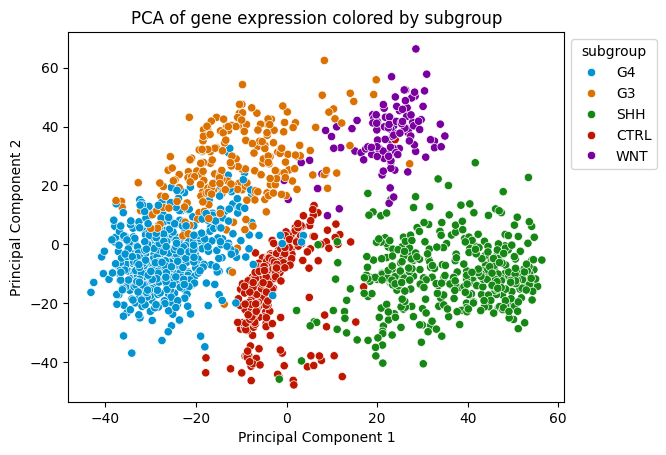

In [7]:
#PCA of gene expression colored by subgroup
palette_subg = [ '#0293d1', #G4
           '#db7100', #G3
           '#168714', #SHH
           '#bf1600', #CTRL
           '#79009e' #WNT
          ]
#sns.color_palette("Set2") #palette='tab20'
plot = sns.scatterplot(data=PCA_df, x='Principal Component 1', y='Principal Component 2', hue="subgroup",palette=palette_subg)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('PCA of gene expression colored by subgroup')



Text(0.5, 1.0, 'PCA of gene expression coloured by sex')

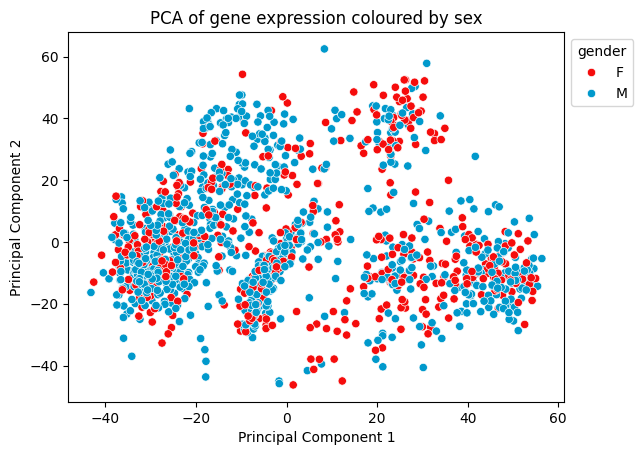

In [8]:
#PCA of gene expression coloured by sex'
palette = ["#f50c0c","#0099CC"]
plot = sns.scatterplot(data=PCA_df, x='Principal Component 1', y='Principal Component 2', hue="gender",palette = palette)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('PCA of gene expression coloured by sex')

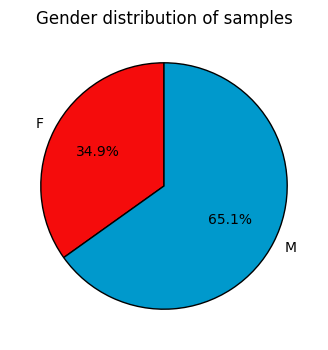

In [9]:
#PIE CHART OF SEX DISTRIBUTION
gender_counts = sample['gender'].value_counts()

labels = ['F', 'M']
sizes = [gender_counts.get('F', 0), gender_counts.get('M', 0)]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=palette,     autopct='%1.1f%%', 
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Gender distribution of samples')
plt.show()

In [10]:
sample['gender'].value_counts() 

gender
M    906
F    485
Name: count, dtype: int64

In [11]:
#TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(expression)
tsne.kl_divergence_

tsne_df = pd.DataFrame(data=X_tsne, columns=['tSNE 1', 'tSNE 2'])

sampleS = sample.reset_index()

tsne_df = pd.merge(tsne_df,sampleS,left_index=True, right_index=True)
tsne_df = tsne_df.set_index('Sample name')


Text(0.5, 1.0, 'tSNE of gene expression coloured by subgroup')

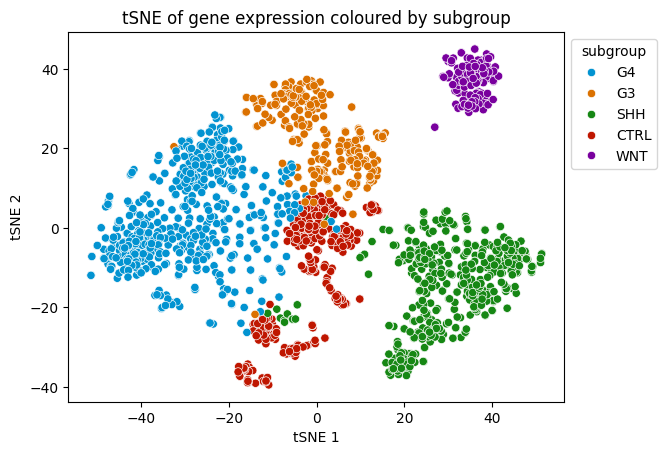

In [12]:
#tSNE of gene expression coloured by subgroup
plot = sns.scatterplot(data=tsne_df, x='tSNE 1', y='tSNE 2', hue="subgroup",palette=palette_subg)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('tSNE of gene expression coloured by subgroup')

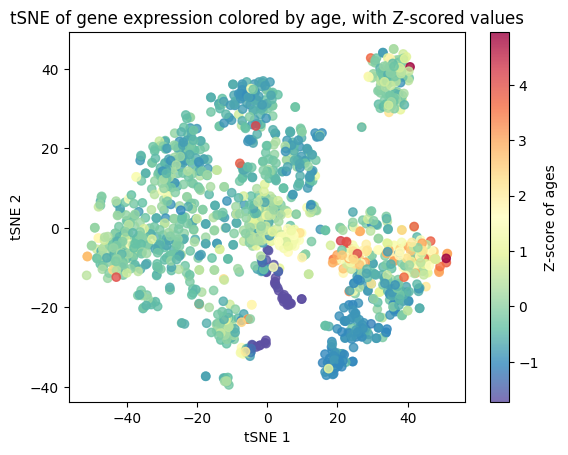

In [13]:
#COLORING BY AGE
scatter = plt.scatter(tsne_df['tSNE 1'], tsne_df['tSNE 2'], c=tsne_df['age_z'],  
    cmap='Spectral_r', alpha=0.8)

plt.colorbar(scatter, label='Z-score of ages')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('tSNE of gene expression colored by age, with Z-scored values')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'tSNE of gene expression coloured by gender')

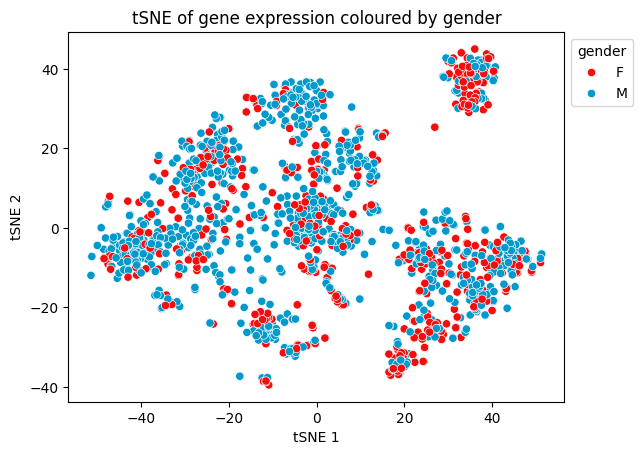

In [14]:
#tSNE of gene expression coloured by gender
palette = ["#f50c0c","#0099CC"]
plot = sns.scatterplot(data=tsne_df, x='tSNE 1', y='tSNE 2', hue="gender",palette=palette)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('tSNE of gene expression coloured by gender')

In [15]:
#MELTING NO SUBSETTING
expression = expression.reset_index() #RUN THIS ONLY ONCE
matrix = matrix.reset_index()
#MELTING NO SUBSETTING
melted = pd.melt(expression, id_vars='Sample name', var_name='variable', value_name='value')
melted['condition'] = 0
genes = ['MYC']
melted.loc[melted['variable'].isin(genes), 'condition'] = 1 #THIS IS A WAY TO EASILY ISOLATE THE TARGET GENES (IN THIS CASE MYC)

melted = pd.merge(melted, sample, on='Sample name', how='left')



#SUBGROUPING
melted['age_group'] = melted['age_y'].apply(lambda x: 'age < 20' if x < 20 else 'age ≥ 20')
melted['age_group_z'] = melted['age_z'].apply(lambda x: 'Z < 0' if x < 0 else 'Z ≥ 0')

F = melted.loc[melted['gender']=='F']
M = melted.loc[melted['gender']=='M']
young = melted.loc[melted['age_group']=='age < 20']
old = melted.loc[melted['age_group']!='age < 20']

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

M_0 vs. M_1: t-test independent samples, P_val:3.917e-01 t=8.566e-01
F_0 vs. F_1: t-test independent samples, P_val:3.395e-01 t=-9.551e-01
F_1 vs. M_1: t-test independent samples, P_val:6.281e-01 t=4.845e-01
F_0 vs. M_0: t-test independent samples, P_val:1.993e-01 t=-1.283e+00


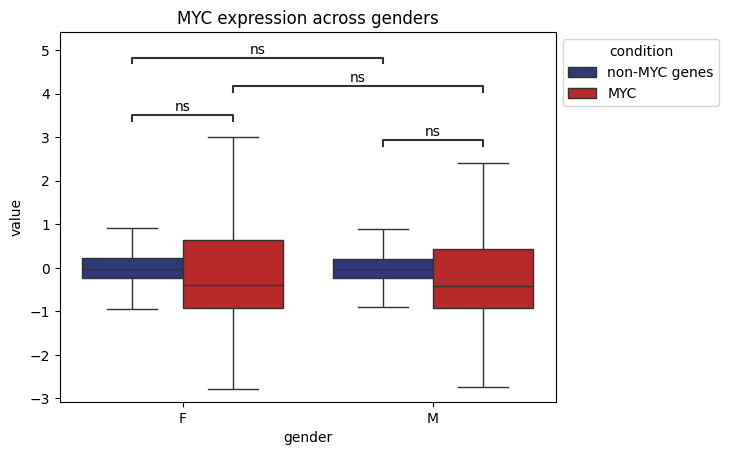

In [16]:
#MYC expression across genders
palette_hue = ['#233182', '#cf1313']


plot = sns.boxplot(
    data=melted, x='gender', y='value', hue='condition',
    showfliers=False, palette=palette_hue
)
plot.set_title('MYC expression across genders')

# DEFINING PAIRS
pairs = [
    (("F", 0), ("F", 1)),
    (("M", 0), ("M", 1)),
    (("F", 1), ("M", 1)),
    (("F", 0), ("M", 0)),
]


# STATISTICAL SIGNIFICANCE
annotator = Annotator(plot, pairs, data=melted, x='gender', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()


#PLOTTING DETAILS
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
new_labels = ['non-MYC genes', 'MYC']
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=new_labels, title="condition", loc="upper left", bbox_to_anchor=(1, 1))

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

age ≥ 20_0 vs. age ≥ 20_1: t-test independent samples, P_val:2.400e-30 t=1.145e+01
age < 20_0 vs. age < 20_1: t-test independent samples, P_val:4.906e-08 t=-5.455e+00


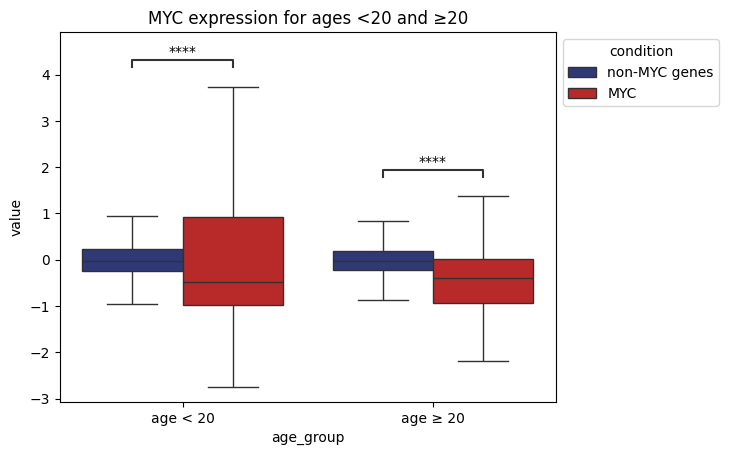

In [17]:
#MYC expression for ages <20 and >20

plot = sns.boxplot(
    data=melted,
    x='age_group',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression for ages <20 and ≥20')

# DEFINING PAIRS
pairs = [
    (('age < 20', 0), ('age < 20', 1)),
    (('age ≥ 20', 0), ('age ≥ 20', 1)),
]

# STATISTICAL SIGNIFICANCE
annotator = Annotator(plot, pairs, data=melted, x='age_group', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

#PLOTTING DETAILS
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


In [18]:
melted['age_group_z'].unique()

array(['Z < 0', 'Z ≥ 0'], dtype=object)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Z ≥ 0_0 vs. Z ≥ 0_1: t-test independent samples, P_val:2.245e-12 t=7.018e+00
Z < 0_0 vs. Z < 0_1: t-test independent samples, P_val:3.611e-05 t=-4.131e+00


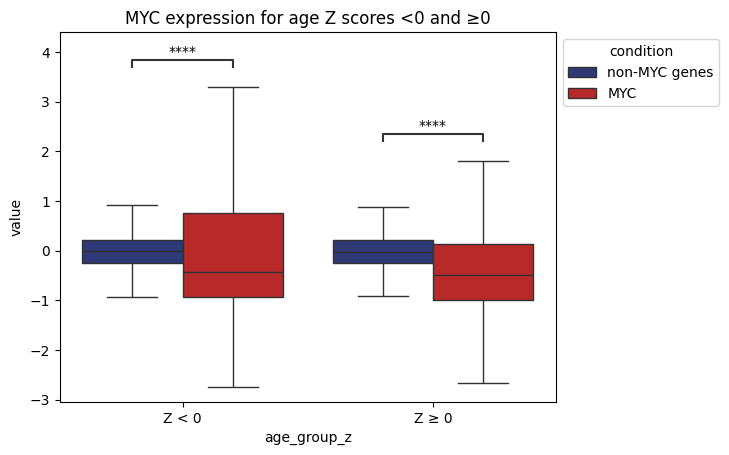

In [19]:
#MYC expression for ages <20 and >20

plot = sns.boxplot(
    data=melted,
    x='age_group_z',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression for age Z scores <0 and ≥0')

# DEFINING PAIRS
pairs = [
    (('Z < 0', 0), ('Z < 0', 1)),
    (('Z ≥ 0', 0), ('Z ≥ 0', 1)),
]

# STATISTICAL SIGNIFICANCE
annotator = Annotator(plot, pairs, data=melted, x='age_group_z', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

#PLOTTING DETAILS
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:0.000e+00 t=-4.738e+01
G4_0 vs. G4_1: t-test independent samples, P_val:4.617e-152 t=2.627e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:3.589e-139 t=2.511e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:1.657e-53 t=1.540e+01
WNT_0 vs. WNT_1: t-test independent samples, P_val:2.783e-229 t=-3.233e+01


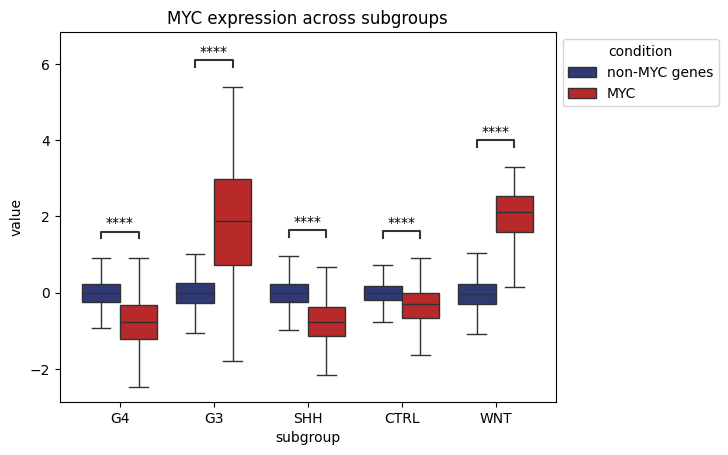

In [20]:
#MYC expression across subgroups

plot = sns.boxplot(
    data=melted,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups')

subgroup_list = melted['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=melted, x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:3.562e-265 t=-3.479e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:1.657e-53 t=1.540e+01


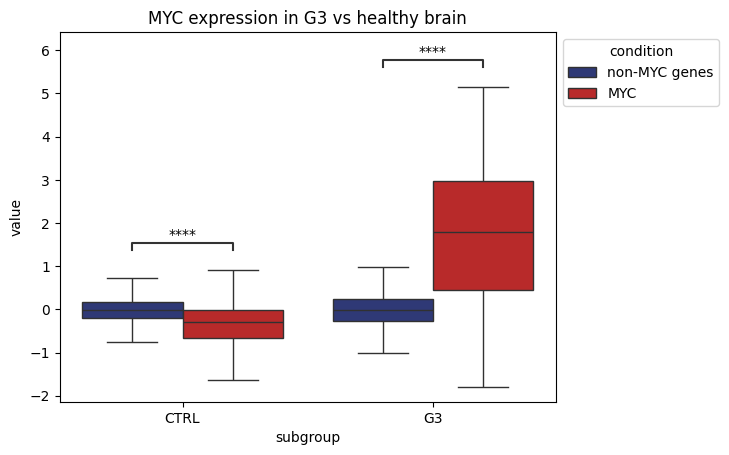

In [21]:
#MYC expression in G3 vs healthy brain
subset = melted.loc[((melted['subgroup'] == 'G3') | (melted['subgroup'] == 'CTRL' )) & (melted['subtype'] != 'Not_Specified')]
subset = subset.copy(deep=True)

palette_hue = ['#233182', '#cf1313']  


plot = sns.boxplot(
    data=subset,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression in G3 vs healthy brain')

subgroup_list = subset['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]


annotator = Annotator(plot, pairs, data=subset, x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(
    handles=handles,
    labels=['non-MYC genes', 'MYC'],
    title='condition',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SHH_0 vs. SHH_1: t-test independent samples, P_val:9.192e-45 t=1.404e+01
G4_0 vs. G4_1: t-test independent samples, P_val:1.432e-39 t=1.316e+01
G3_0 vs. G3_1: t-test independent samples, P_val:7.199e-90 t=-2.010e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:3.390e-11 t=6.629e+00
WNT_0 vs. WNT_1: t-test independent samples, P_val:1.087e-118 t=-2.317e+01


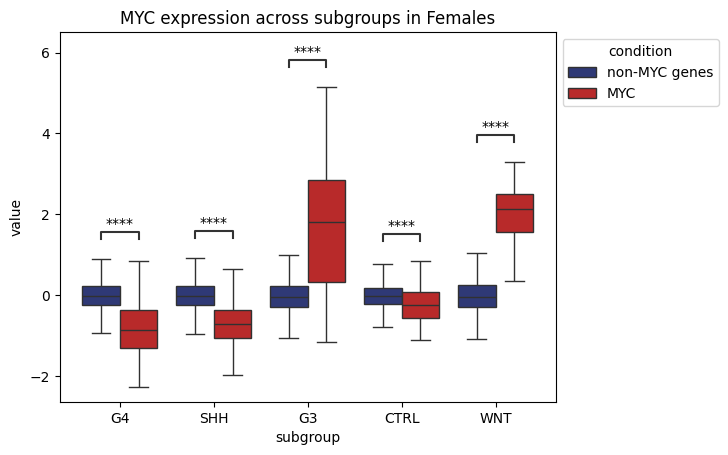

In [22]:
#MYC expression across subgroups in FEMALES

plot = sns.boxplot(
    data=F,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in Females')

subgroup_list = F['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=F ,x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:0.000e+00 t=-3.925e+01
G4_0 vs. G4_1: t-test independent samples, P_val:2.894e-97 t=2.093e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:1.035e-72 t=1.804e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:5.045e-24 t=1.011e+01
WNT_0 vs. WNT_1: t-test independent samples, P_val:5.852e-85 t=-1.954e+01


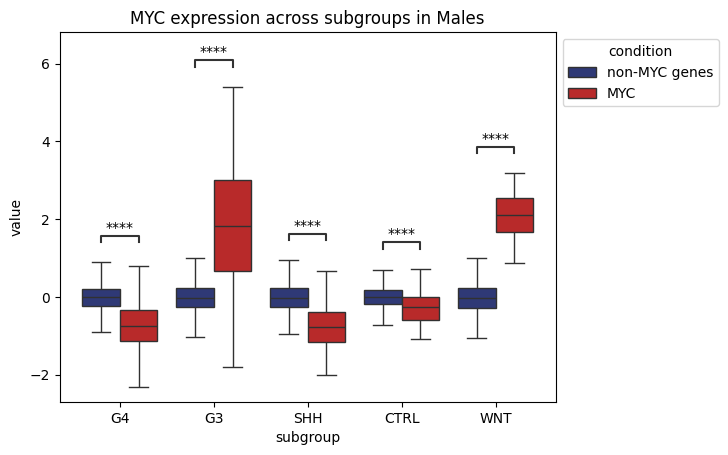

In [23]:
#MYC expression across subgroups in MALES

plot = sns.boxplot(
    data=M,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in Males')

subgroup_list = M['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=M, x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:0.000e+00 t=-4.417e+01
G4_0 vs. G4_1: t-test independent samples, P_val:1.547e-137 t=2.496e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:1.057e-107 t=2.205e+01
WNT_0 vs. WNT_1: t-test independent samples, P_val:4.684e-198 t=-3.003e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:5.694e-01 t=5.690e-01


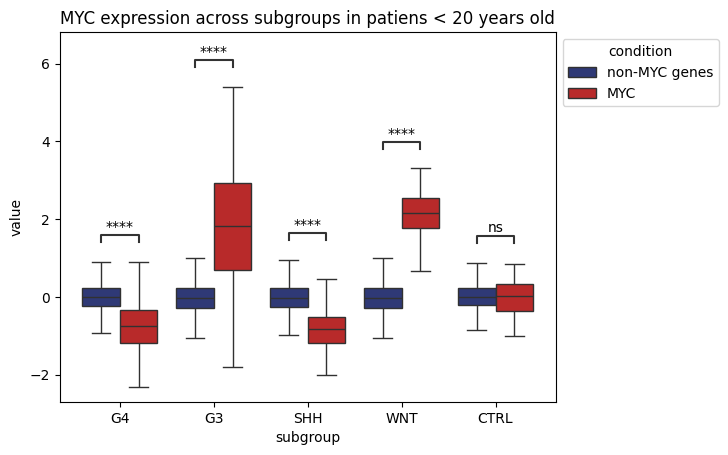

In [24]:
#MYC expression across subgroups in YOUNG

plot = sns.boxplot(
    data=young,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in patiens < 20 years old')

subgroup_list = young['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=young ,x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WNT_0 vs. WNT_1: t-test independent samples, P_val:1.796e-34 t=-1.225e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:1.307e-66 t=1.724e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:1.715e-35 t=1.243e+01
G3_0 vs. G3_1: t-test independent samples, P_val:6.755e-66 t=-1.715e+01
G4_0 vs. G4_1: t-test independent samples, P_val:1.426e-16 t=8.263e+00


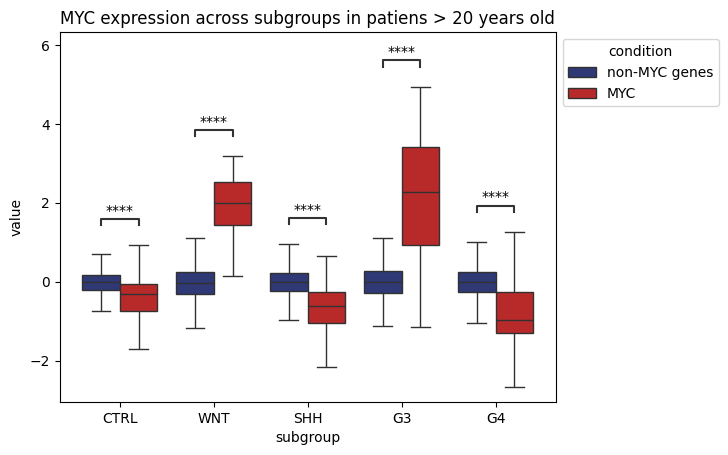

In [25]:
#MYC expression across subgroups in OLD

plot = sns.boxplot(
    data=old,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in patiens > 20 years old')

subgroup_list = old['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=old ,x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['non-MYC genes', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)


Text(0.5, 1.0, 'PCA of gene expression coloured by healthy vs diseased')

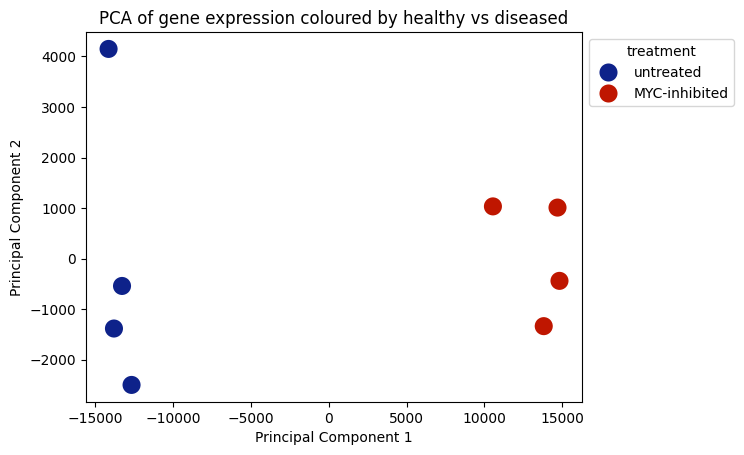

In [26]:
#OMOMYC RE-ANALYSIS
srat = pd.read_csv('data/table/GSE171117.SraRunTable.csv')[['Run','treatment']]
srat.set_index('Run',inplace=True)

omomyc_fpkm = pd.read_csv('data/table/OMOMYC_FILTERED_FPKM.csv.gz') #obtained from r script
#omomyc_fpkm = pd.read_csv('data/table/GSE171117_norm_counts_FPKM_GRCh38.p13_NCBI.tsv.gz',sep='\t') #downloaded from GEO

omomyc_fpkm.rename(columns={'Unnamed: 0': 'GeneID'},inplace=True)
omomyc_fpkm.set_index('GeneID',inplace = True)
omomyc_fpkm = omomyc_fpkm.T

PCA_df= runPCA(expression=omomyc_fpkm,sample=srat )

#PCA of gene expression coloured by treated vs untreated
plot = sns.scatterplot(data=PCA_df, x='Principal Component 1', y='Principal Component 2', 
                       hue="treatment",
                       s=200, 
                       palette = ["#0e228a","#bf1600"])
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

plot.set_title('PCA of gene expression coloured by healthy vs diseased')

In [4]:
#LOADING THE EDGER RESULTS (R-SCRIPT OUTPUT)
omomyc = pd.read_csv('data/table/OMOMYC_EDGER_RESULTS.csv')
omomyc.rename(columns={'gene': 'ensembl_gene_id'},inplace=True)
omomyc = omomyc.merge(pd.read_csv('data/genlist/OMOMYC_EXPRESSED_ensmbl.txt',sep='\t'),on='ensembl_gene_id').drop(columns=['ensembl_gene_id','external_gene_name'])
omomyc = omomyc.loc[(omomyc['FDR'] < 0.05) & (omomyc['logFC'].abs() >= 1)]
up = omomyc.loc[omomyc['logFC'] > 0, 'hgnc_symbol'].tolist()
down = omomyc.loc[omomyc['logFC'] < 0, 'hgnc_symbol'].tolist()

#GO FOR OMOMYC SYSTEM - RESULTS OBTAINED FROM WEBGESTAT SERVER
keep = ['description','size','pValue','FDR','userId']
BP_UP = pd.read_csv('data/GO/GO_BP/enrichment_results_wg_result1749054737_OMO_UP.txt',sep='\t')[keep]
BP_DOWN = pd.read_csv('data/GO/GO_BP/enrichment_results_wg_result1749054737_OMO_DOWN.txt',sep='\t')[keep]
CC_UP = pd.read_csv('data/GO/GO_CC/enrichment_results_wg_result1749054947_OMO_UP.txt',sep='\t')[keep]
CC_DOWN = pd.read_csv('data/GO/GO_CC/enrichment_results_wg_result1749054947_OMO_DOWN.txt',sep='\t')[keep]
MF_UP = pd.read_csv('data/GO/GO_MF/enrichment_results_wg_result1749054958_OMO_UP.txt',sep='\t')[keep]
MF_DOWN = pd.read_csv('data/GO/GO_MF/enrichment_results_wg_result1749054958_OMO_DOWN.txt',sep='\t')[keep]


def plot_go_bar(df, title="GO Enrichment", size_col='size', color_col='FDR', desc_col='description', order_by='FDR', cmap_name="flare_r"):
    # Sort by the specified order column
    if order_by == 'FDR':
        df = df.sort_values(color_col).copy()
    elif order_by == 'size':
        df = df.sort_values(size_col, ascending=False).copy()
    else:
        raise ValueError("order_by must be either 'FDR' or 'size'")

    # Normalize color column for coloring
    norm = mpl.colors.Normalize(vmin=df[color_col].min(), vmax=df[color_col].max())
    cmap = sns.color_palette(cmap_name, as_cmap=True)

    # Map colors based on the color column
    colors = [cmap(norm(val)) for val in df[color_col]]

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Bar plot
    bars = ax.barh(
        y=df[desc_col], 
        width=df[size_col], 
        color=colors
    )

    # Invert y-axis so largest bar is on top
    ax.invert_yaxis()

    # Colorbar
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label=color_col)

    # Labels
    ax.set_xlabel("Gene Set Size")
    ax.set_ylabel("GO Term")
    ax.set_title(title)

    plt.tight_layout()
    plt.show()


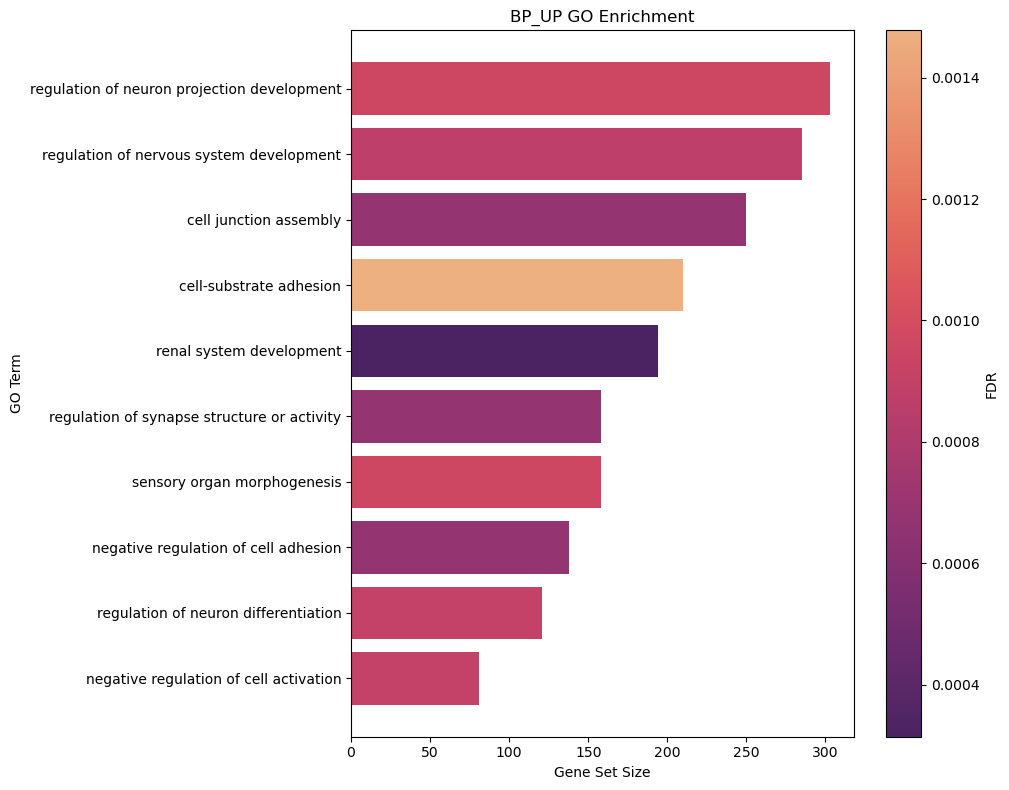

In [6]:
plot_go_bar(BP_UP, title="BP_UP GO Enrichment", order_by='size')

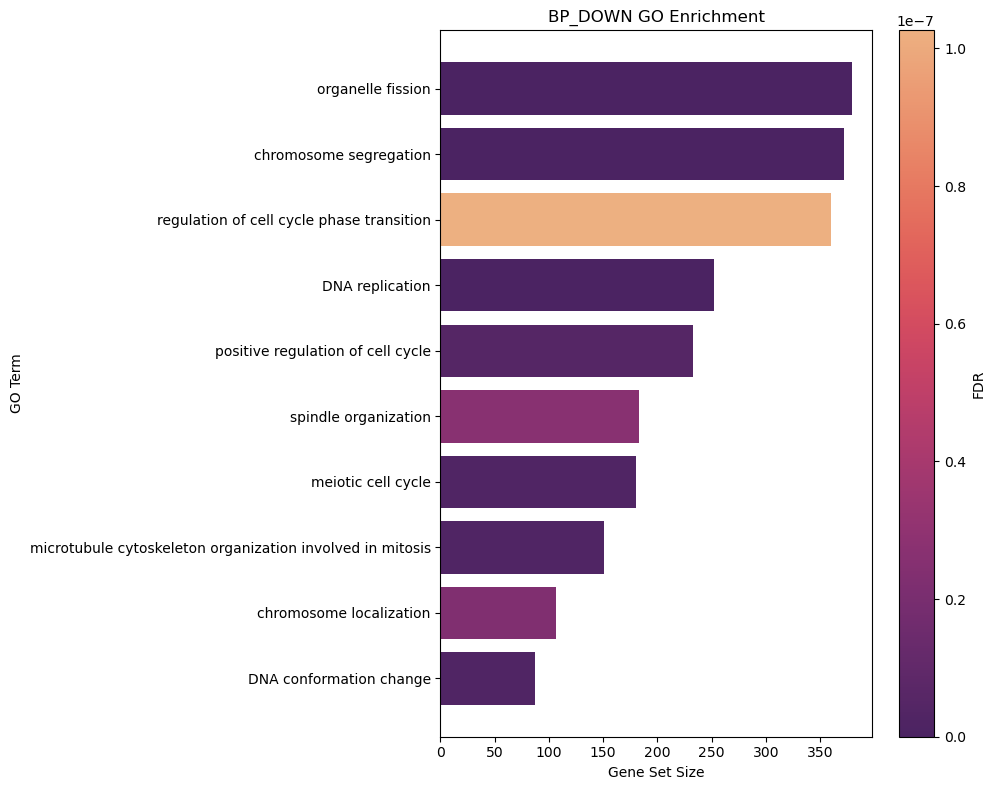

In [7]:
plot_go_bar(BP_DOWN, title="BP_DOWN GO Enrichment", order_by='size')

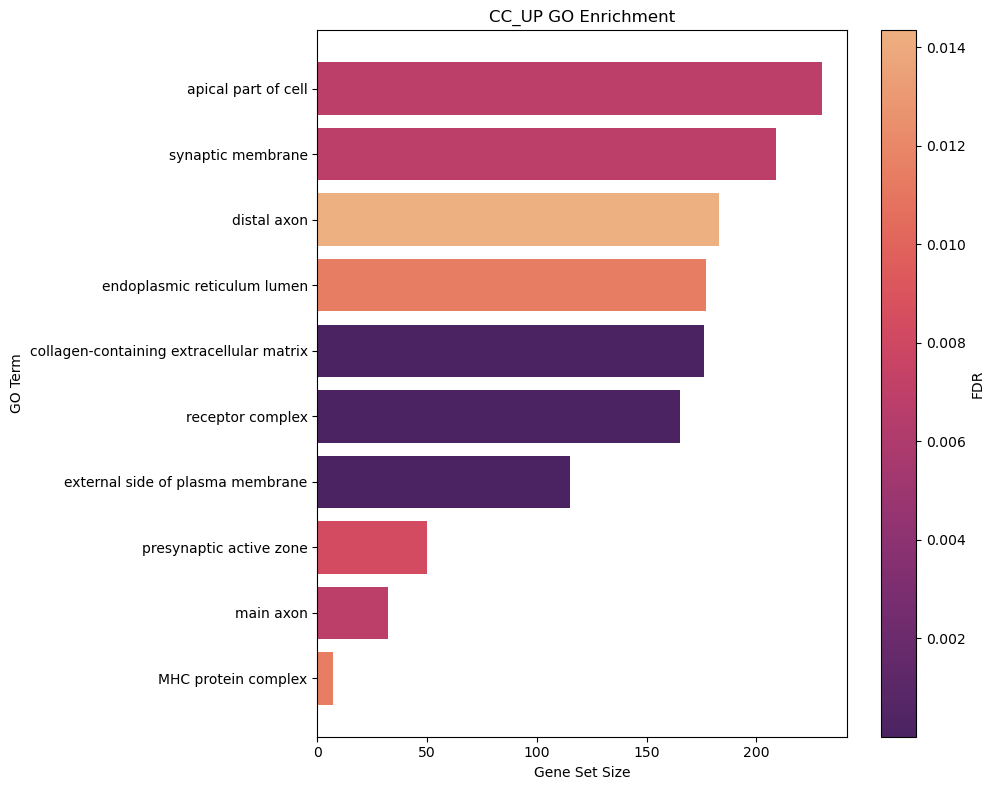

In [9]:
plot_go_bar(CC_UP, title="CC_UP GO Enrichment", order_by='size')

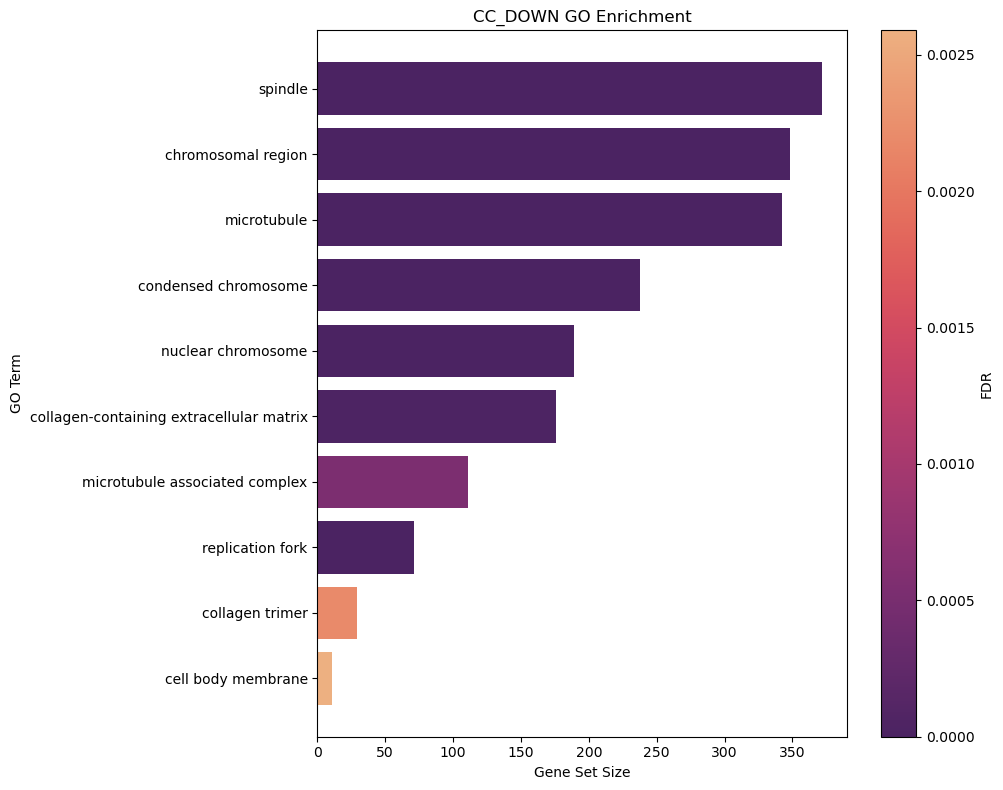

In [10]:
plot_go_bar(CC_DOWN, title="CC_DOWN GO Enrichment", order_by='size')

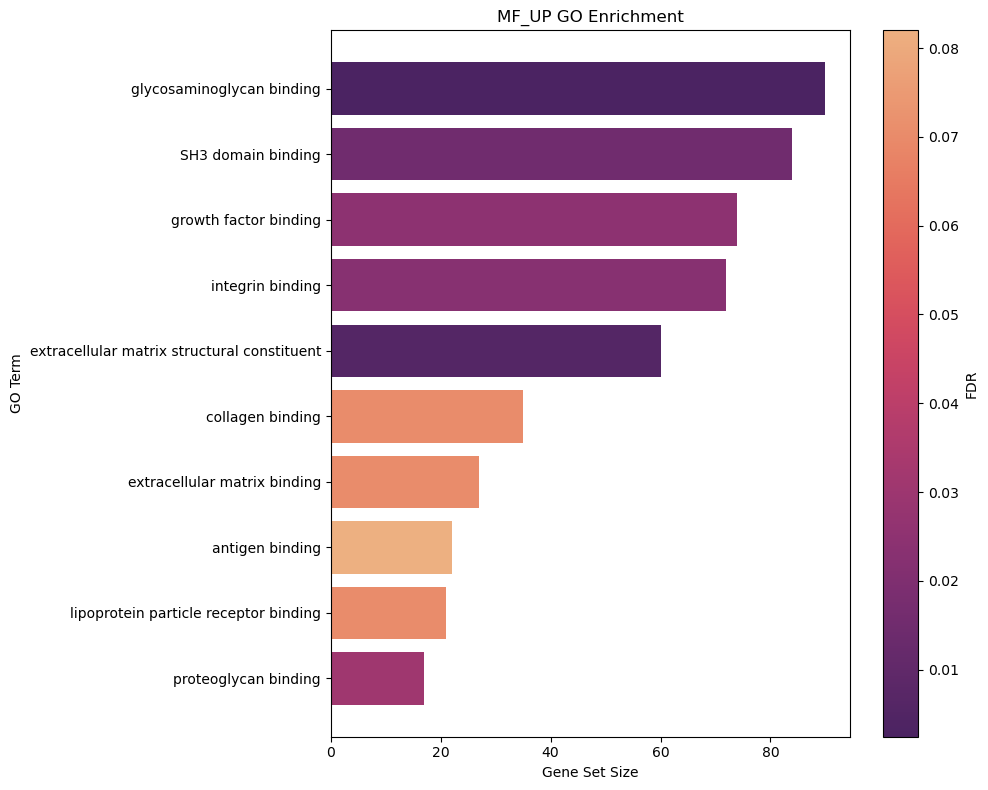

In [8]:
plot_go_bar(MF_UP, title="MF_UP GO Enrichment", order_by='size')

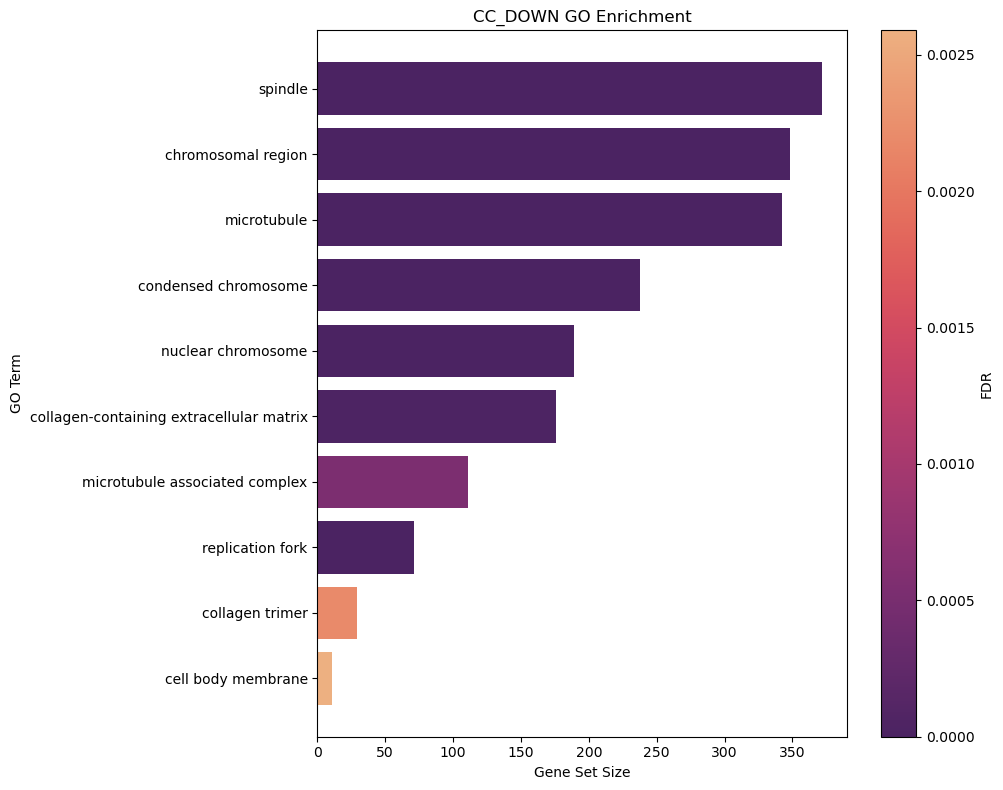

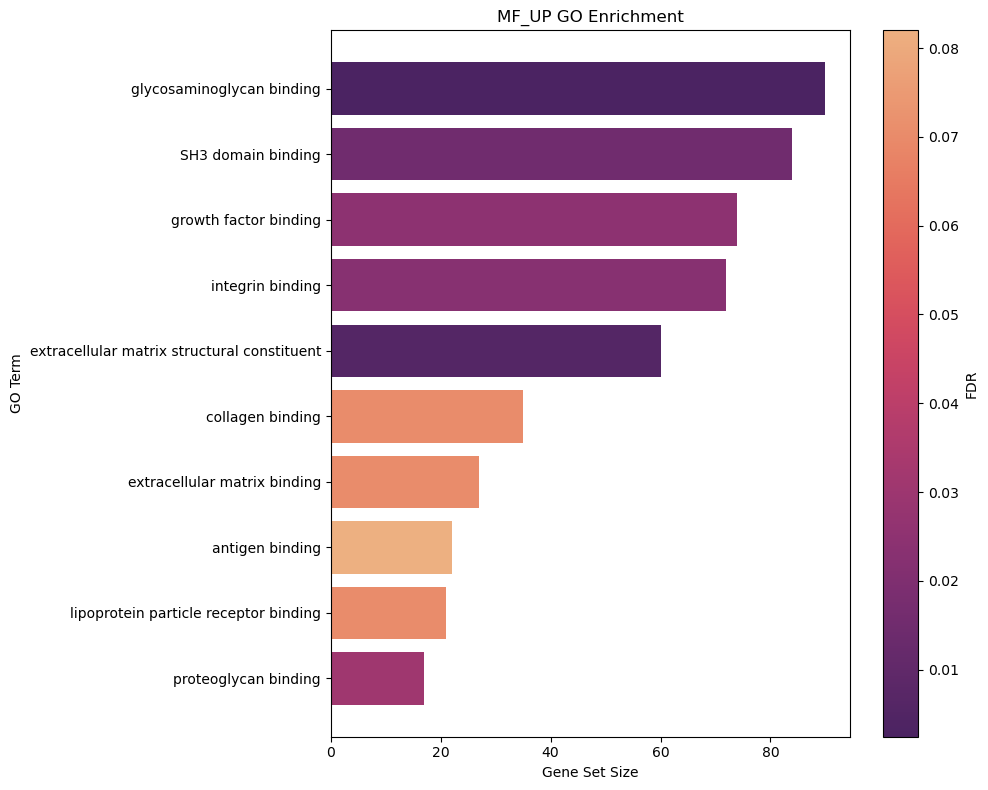

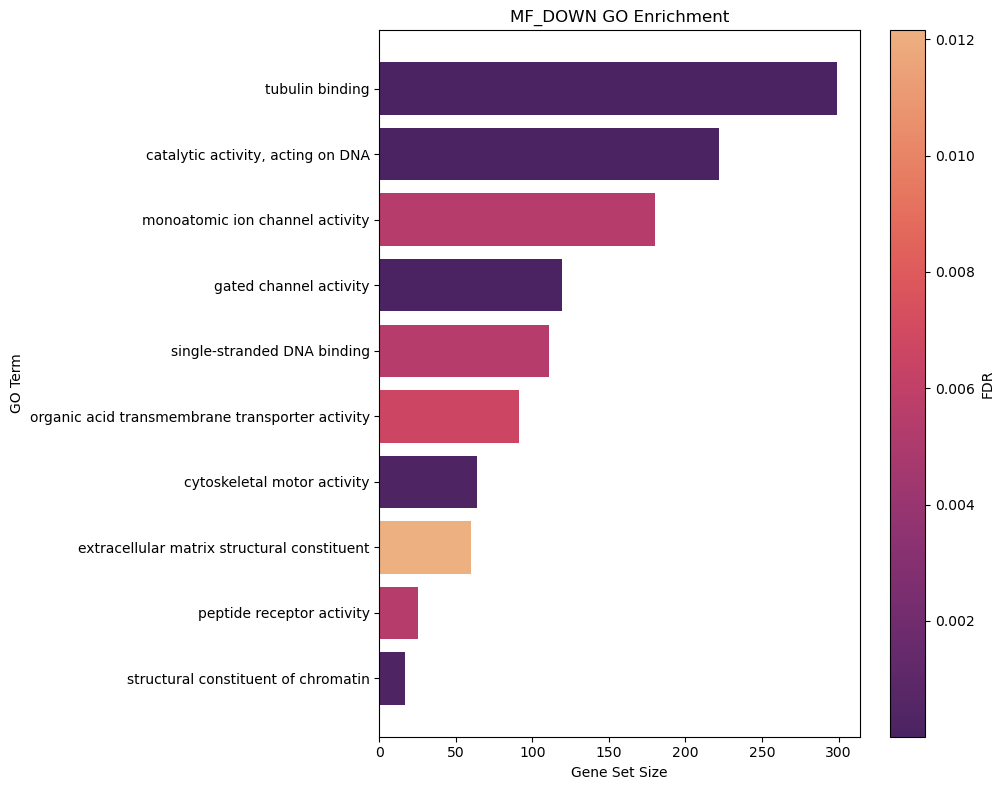

In [ ]:
plot_go_bar(MF_DOWN, title="MF_DOWN GO Enrichment", order_by='size')

In [11]:
# EXCTRACTING CORR MATRIX
# matrix_corr = zscored_matrix.corr(method='spearman')
# matrix_corr
# matrix_corr.to_csv('data/table/BigArray_SPCORR.csv.gz',compression='gzip')
omomyc_ens = pd.read_csv('data/genlist/OMOMYC_EXPRESSED_ensmbl.txt',sep='\t')

sp_corr  = pd.read_csv('data/table/BigArray_SPCORR.csv.gz')

sp_corr.rename(columns={'Unnamed: 0': 'hgnc_symbol'},inplace=True)

universe = list(set(omomyc_ens['hgnc_symbol'].tolist()))

filtered_corr = sp_corr[sp_corr['hgnc_symbol'].isin(universe)]

#ISOLATING THE MYC CORRELATIONS
Array_MYC_corr = filtered_corr[['hgnc_symbol', 'MYC']].copy()

#ISOLATING THE UP AND DOWNREGULATED GENES IN THE OMOMYC SYSTEM, THEN ANNOTATING TO THE CORRELATIONS
up = omomyc.loc[omomyc['logFC'] > 0, 'hgnc_symbol'].tolist()
down = omomyc.loc[omomyc['logFC'] < 0, 'hgnc_symbol'].tolist()

# # EXPORTING TO FILE FOR WEBGESTAT USE
# with open("data/genlist/OMO_UP.txt", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in up))

# with open("data/genlist/OMO_DOWN.txt", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in down))

# with open("data/genlist/universe.txt", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in universe))


Array_MYC_corr['label'] = 'Normal/Undetected'
Array_MYC_corr.loc[Array_MYC_corr['hgnc_symbol'].isin(up), 'label'] = 'Up'
Array_MYC_corr.loc[Array_MYC_corr['hgnc_symbol'].isin(down), 'label'] = 'Down'

#CLEANING
Array_MYC_corr['label'].value_counts()
Array_MYC_corr.dropna()
Array_MYC_corr.drop_duplicates()
Array_MYC_corr['label'].value_counts()

#COMPUTING Z SCORE OF MYC COLUMN
Array_MYC_corr['zscore'] = zscore(Array_MYC_corr['MYC'], nan_policy='omit')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Down vs. Normal/Undetected: t-test independent samples, P_val:1.295e-40 t=1.341e+01
Normal/Undetected vs. Up: t-test independent samples, P_val:9.290e-14 t=7.463e+00
Down vs. Up: t-test independent samples, P_val:8.191e-44 t=1.438e+01


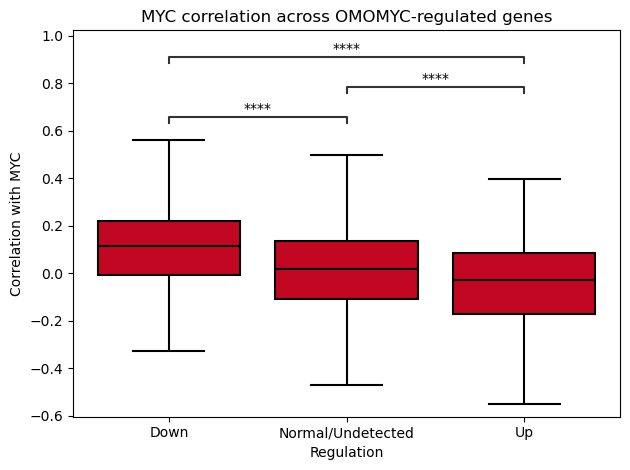

In [12]:
#PLOTTING CORRELATION TREND AGAINST REGULATION IN OMOMYC SYSTEM 
x_order = ['Down', 'Normal/Undetected', 'Up']

line_style = dict(color='black', linewidth=1.5)

plot = sns.boxplot(
    data=Array_MYC_corr,
    x='label',
    y='MYC',
    order=x_order,
    boxprops=dict(facecolor='#c10721', edgecolor='black', linewidth=1.5),
    medianprops=line_style,
    whiskerprops=line_style,
    capprops=line_style,
    showfliers=False,
)


valid_pairs = [
    ('Down', 'Normal/Undetected'),
    ('Normal/Undetected', 'Up'),
    ('Down', 'Up')]


annotator = Annotator(plot, valid_pairs, data=Array_MYC_corr, x='label', y='MYC', order=x_order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()


plt.title("MYC correlation across OMOMYC-regulated genes")
plt.xlabel("Regulation")
plt.ylabel("Correlation with MYC")
plt.tight_layout()
plt.show()

/tmp/ipykernel_8974/721096361.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


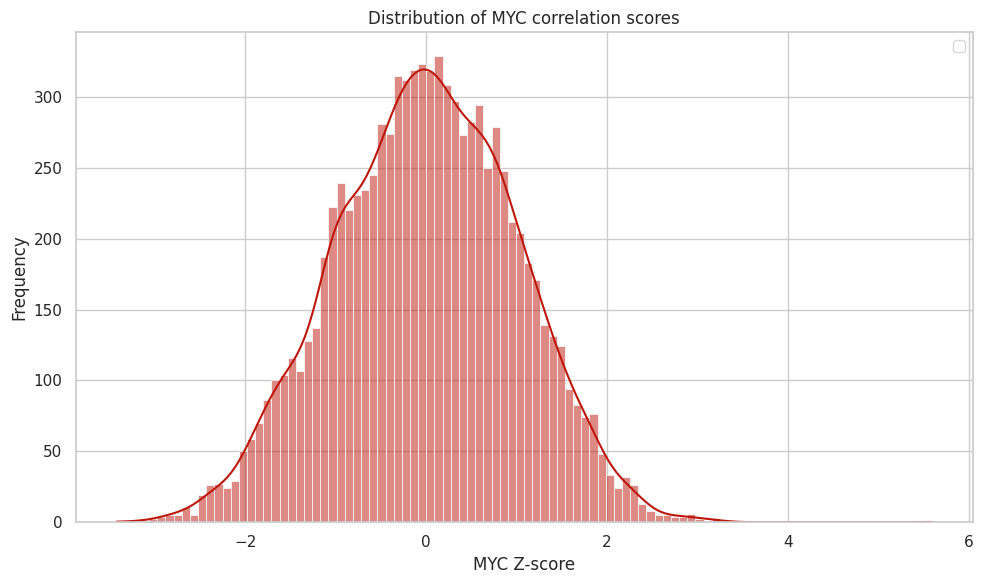

In [31]:
#PLOTTING DISTRUBUTION TO CHECK FOR NORMALITY
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=Array_MYC_corr, x='zscore', bins=100, kde=True, color='#bd170b')

plt.title('Distribution of MYC correlation scores')
plt.xlabel('MYC Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

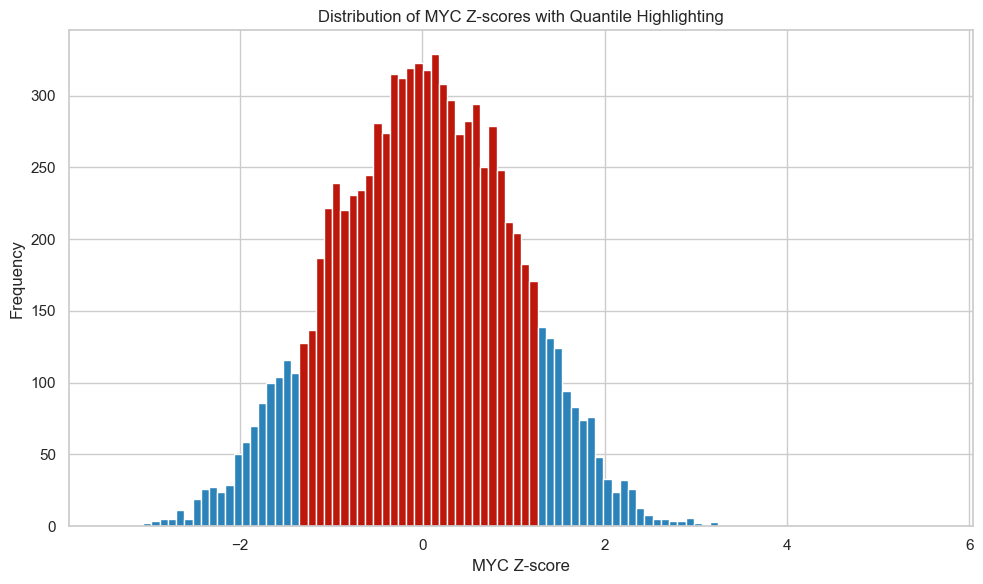

In [14]:
# GETTING THE TAILS (90TH AND 10TH PERCENTILES)
q90 = Array_MYC_corr['zscore'].quantile(0.9)
q10 = Array_MYC_corr['zscore'].quantile(0.1)


# REMAKING THE HISTOGRAM TO COLOR THE QUANTILES
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Get histogram bin counts
counts, bins = np.histogram(Array_MYC_corr['zscore'], bins=100)

# Plot colored bars
for i in range(len(bins)-1):
    bin_left = bins[i]
    bin_right = bins[i+1]
    
    # Check if bin center is within quantiles
    bin_center = (bin_left + bin_right) / 2
    if bin_center <= q10:
        color = '#2b83ba'  # blue for bottom 10%
    elif bin_center >= q90:
        color = '#2b83ba'  # red for top 10%
    else:
        color = '#bd170b'  # default color

    plt.bar(bin_center, counts[i], width=(bin_right-bin_left), color=color, align='center')

plt.title('Distribution of MYC Z-scores with Quantile Highlighting')
plt.xlabel('MYC Z-score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [15]:
# TOP  AND BOTTOM 10% GENES
top_genes = Array_MYC_corr[Array_MYC_corr['zscore'] > q90]

bottom_genes = Array_MYC_corr[Array_MYC_corr['zscore'] < q10]

nUP =Array_MYC_corr['label'].value_counts()['Up']
nDOWN =Array_MYC_corr['label'].value_counts()['Down']

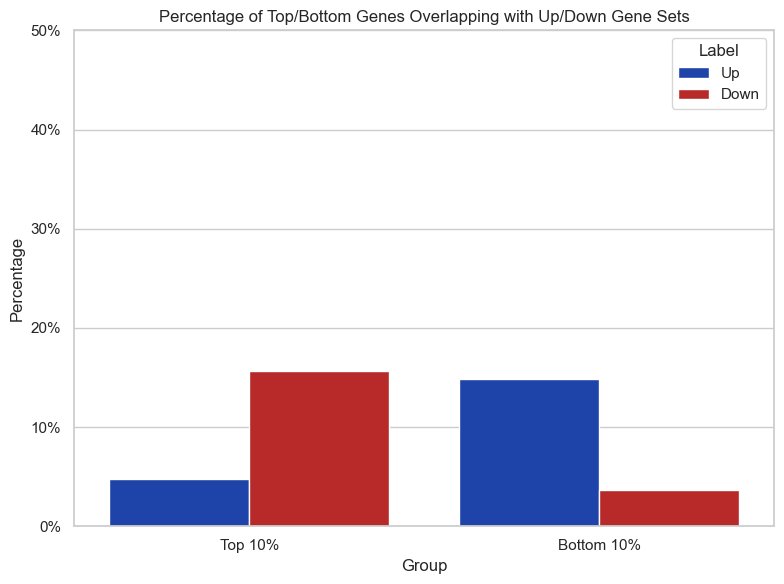

In [16]:
# Calculate overlaps 
#top_genes that match with genes in down / total down genes
perc_top_down = (top_genes['label'].value_counts().get('Down', 0) / len(down)) * 100

# Top genes that match with genes in up / total up genes
perc_top_up = (top_genes['label'].value_counts().get('Up', 0) / len(up)) * 100

# Bottom genes that match with genes in down / total down genes
perc_bottom_down = (bottom_genes['label'].value_counts().get('Down', 0) / len(down)) * 100

# Bottom genes that match with genes in up / total up genes
perc_bottom_up = (bottom_genes['label'].value_counts().get('Up', 0) / len(up)) * 100

# Prepare dataframe for plotting
data = {
    'Group': ['Top 10%', 'Top 10%', 'Bottom 10%', 'Bottom 10%'],
    'Label': ['Up', 'Down', 'Up', 'Down'],
    'Percentage': [
        perc_top_up,
        perc_top_down,
        perc_bottom_up,
        perc_bottom_down
    ]
}

percent_df = pd.DataFrame(data)



palette_hue = ['#073ac1', '#cf1313']

plt.figure(figsize=(8, 6))
sns.barplot(data=percent_df, x='Group', y='Percentage', hue='Label', palette=palette_hue)

plt.title('Percentage of Top/Bottom Genes Overlapping with Up/Down Gene Sets')
plt.ylabel('Percentage')

plt.ylim(0, 50)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

plt.tight_layout()
plt.show()


In [35]:
percent_df

,Group,Label,Percentage
0,Top 10%,Up,4.797048
1,Top 10%,Down,15.678392
2,Bottom 10%,Up,14.883149
3,Bottom 10%,Down,3.618090


In [36]:
#Exporting lists
with open("data/genlist/CORR_TOP.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in top_genes['hgnc_symbol'].tolist()))

with open("data/genlist/CORR_BOTTOM.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in bottom_genes['hgnc_symbol'].tolist()))


In [17]:
#plotting GO
top_set = set(top_genes['hgnc_symbol'])
bottom_set = set(bottom_genes['hgnc_symbol'])

# Define a function to process any dataframe
def process_go(df, intersect_set, colname_prefix):
    df = df.copy()  # to avoid modifying original
    df['gene_list'] = df['userId'].apply(lambda x: x.split(';') if pd.notnull(x) else [])
    df[f'{colname_prefix}_matches'] = df['gene_list'].apply(lambda genes: len(intersect_set.intersection(genes)))
    df[f'{colname_prefix}_percentage'] = df[f'{colname_prefix}_matches'] / df['gene_list'].apply(len) * 100
    return df

# Apply processing
BP_UP = process_go(BP_UP, bottom_set, 'bottom')
BP_DOWN = process_go(BP_DOWN, top_set, 'top')


CC_UP = process_go(CC_UP, bottom_set, 'bottom')
CC_DOWN = process_go(CC_DOWN, top_set, 'top')

MF_UP = process_go(MF_UP, bottom_set, 'bottom')
MF_DOWN = process_go(MF_DOWN, top_set, 'top')


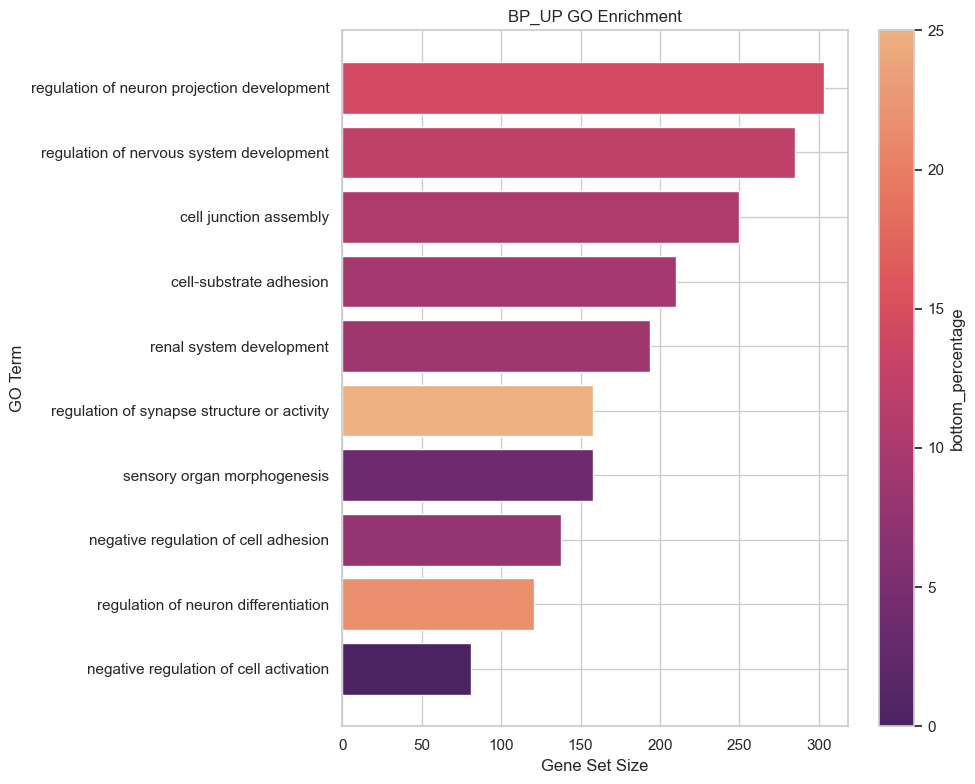

In [18]:
plot_go_bar(BP_UP, title="BP_UP GO Enrichment", color_col='bottom_percentage', order_by='size')

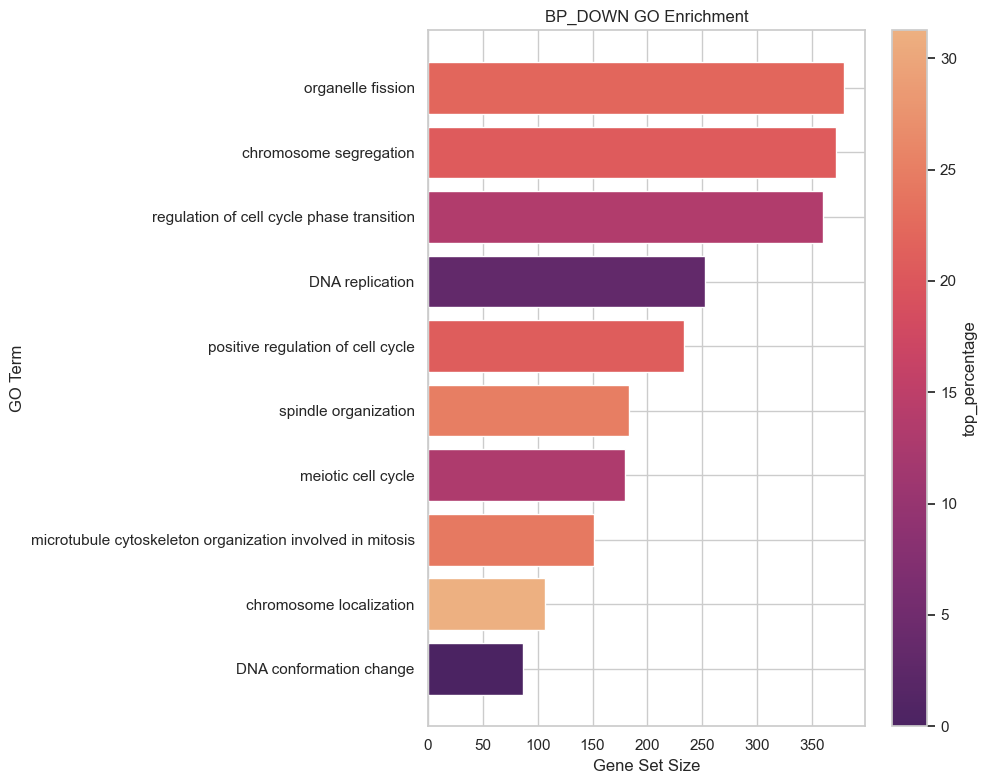

In [19]:
plot_go_bar(BP_DOWN, title="BP_DOWN GO Enrichment", color_col='top_percentage', order_by='size')

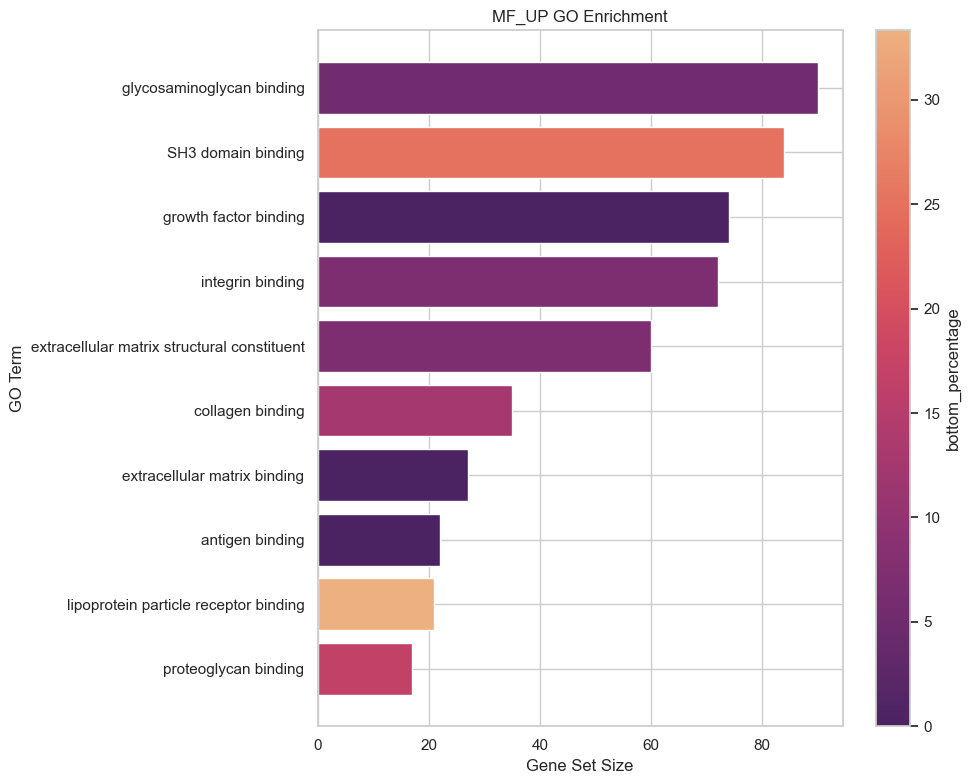

In [21]:
plot_go_bar(MF_UP, title="MF_UP GO Enrichment", color_col='bottom_percentage', order_by='size')

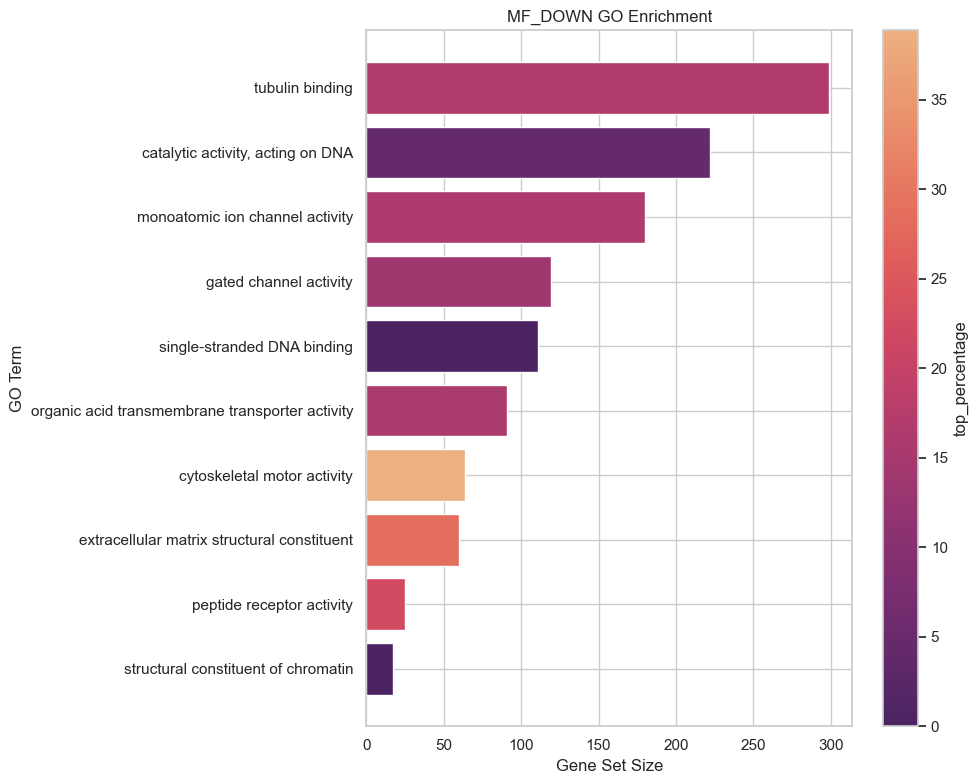

In [22]:
plot_go_bar(MF_DOWN, title="MF_DOWN GO Enrichment", color_col='top_percentage', order_by='size')

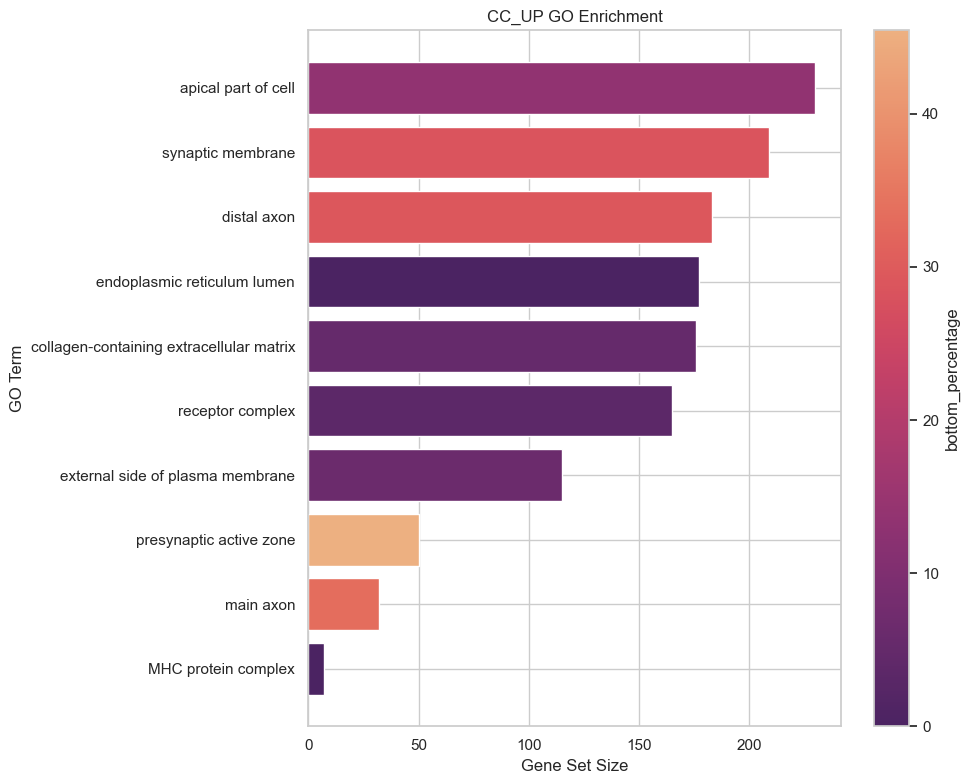

In [23]:
plot_go_bar(CC_UP, title="CC_UP GO Enrichment", color_col='bottom_percentage', order_by='size')

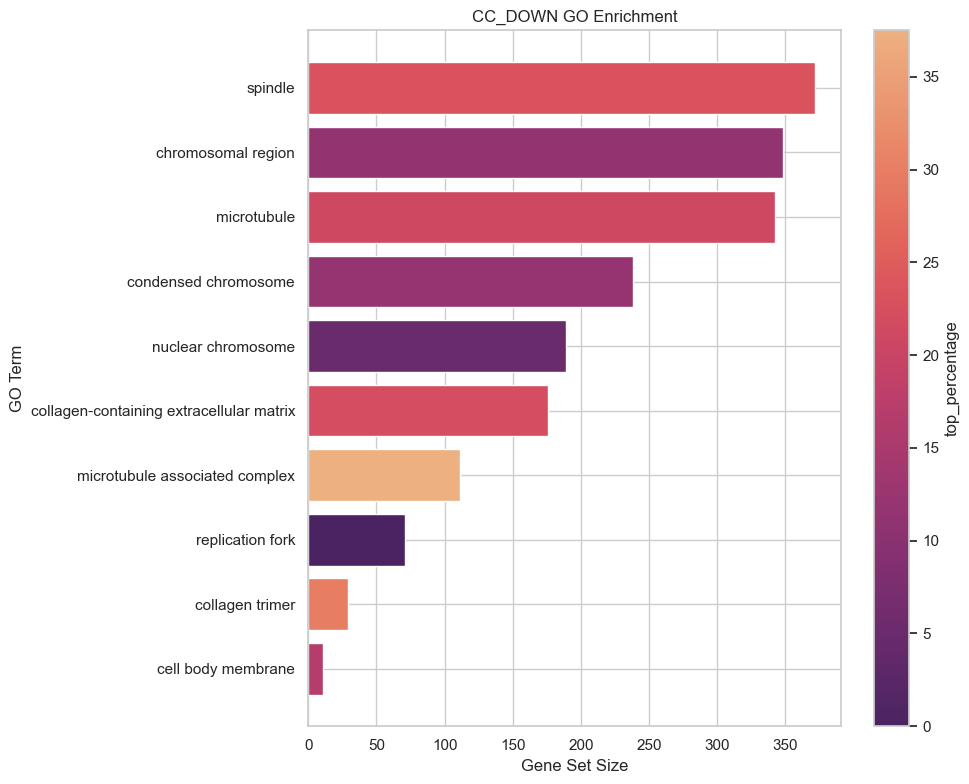

In [24]:
plot_go_bar(CC_DOWN, title="CC_DOWN GO Enrichment", color_col='top_percentage', order_by='size')

In [39]:
print('The end :-)')

The end :-)
